### Data Science Project1

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.isnull().mean()

area_type       0.000000
availability    0.000000
location        0.000075
size            0.001201
society         0.413063
total_sqft      0.000000
bath            0.005480
balcony         0.045721
price           0.000000
dtype: float64

In [7]:
df.society.unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

<AxesSubplot:>

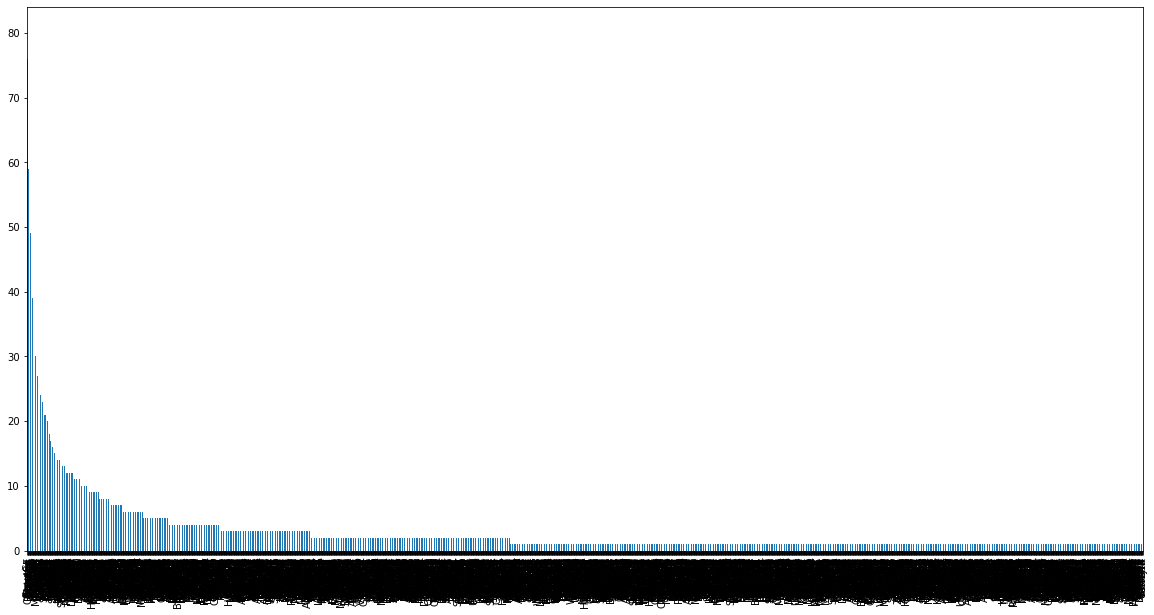

In [8]:
df.society.value_counts().plot.bar()

In [9]:
df.society.mode()

0    GrrvaGr
dtype: object

In [10]:
len(df[df.society=='GrrvaGr'])

80

In [11]:
df.society.isnull().sum()

5502

<AxesSubplot:>

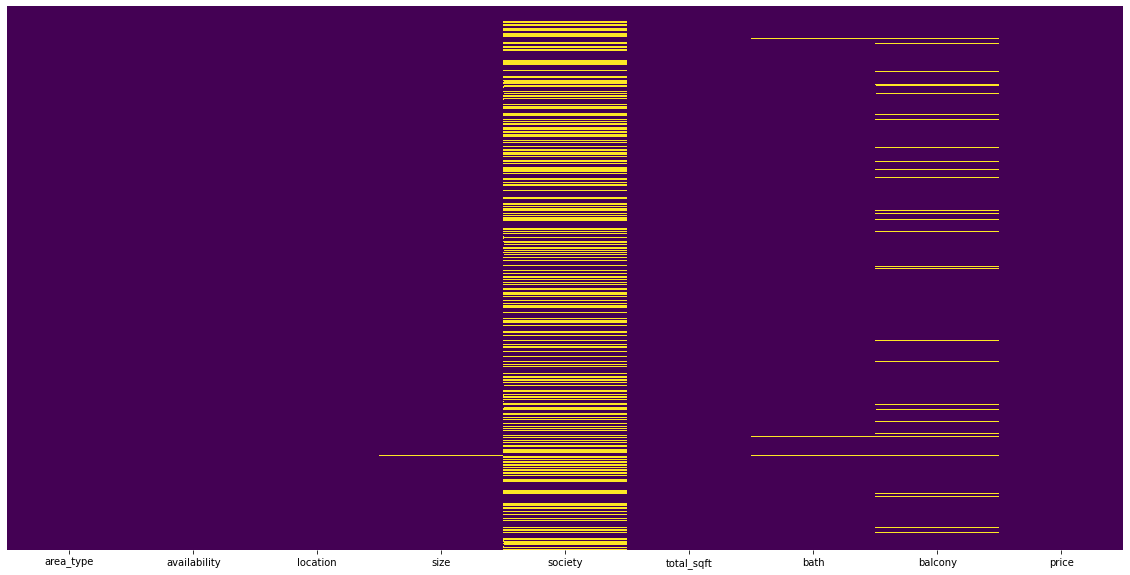

In [12]:
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

#### In society almost half of data is missing so we can just drop it and work on balcony's data and can drop other null values

<AxesSubplot:>

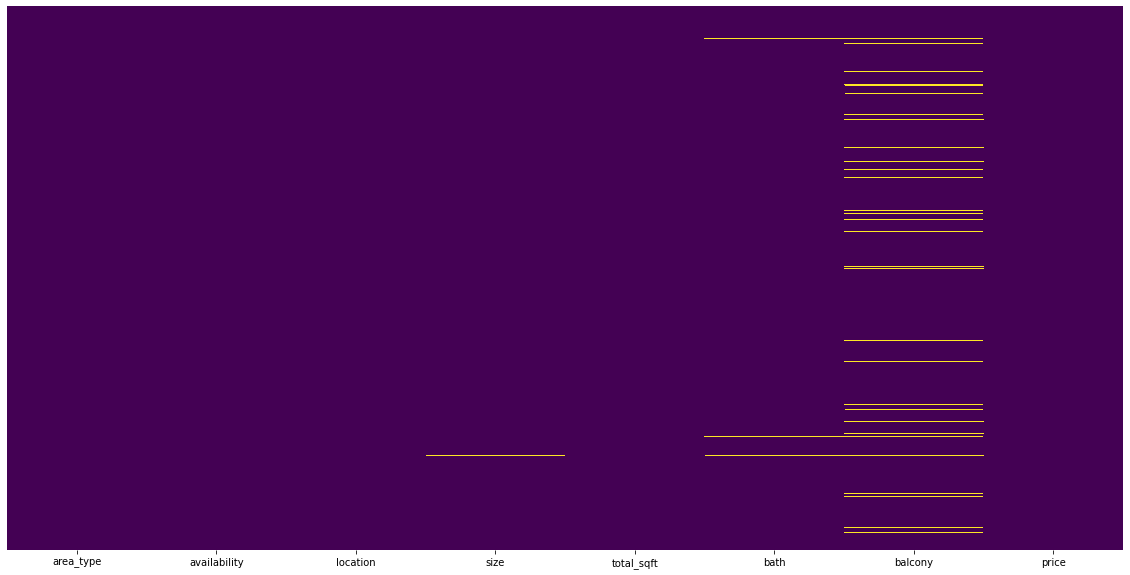

In [13]:
df.drop(['society'], axis=1, inplace=True)
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

### Now we check about balcony

In [14]:
df.balcony.unique()

array([ 1.,  3., nan,  2.,  0.])

In [15]:
len(df.balcony.unique())

5

<AxesSubplot:>

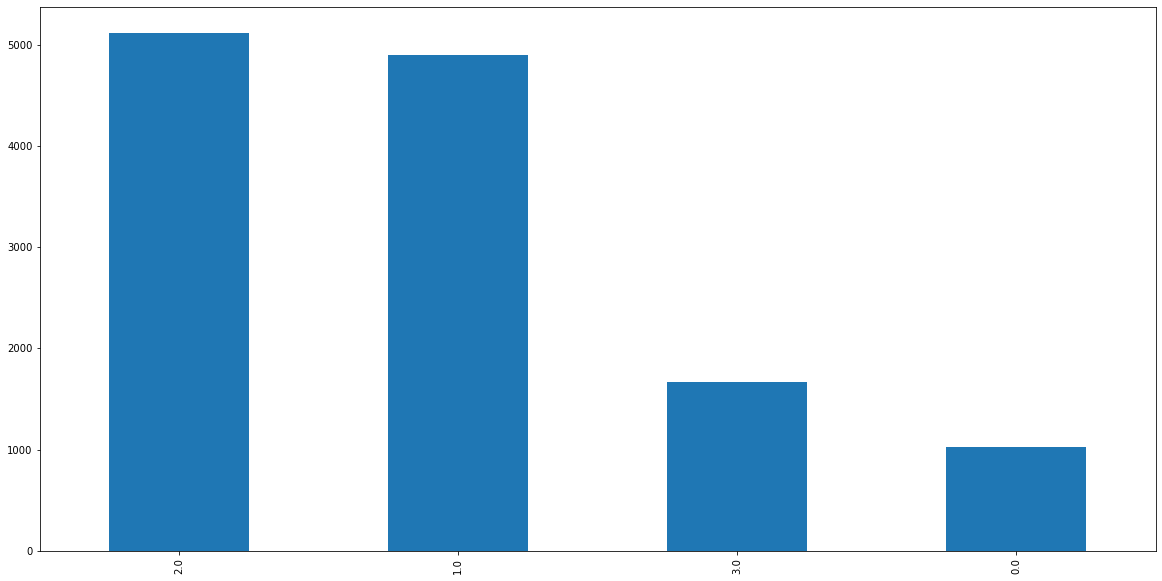

In [16]:
df.balcony.value_counts().plot.bar()

In [18]:
df.corr()

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


<AxesSubplot:xlabel='balcony', ylabel='price'>

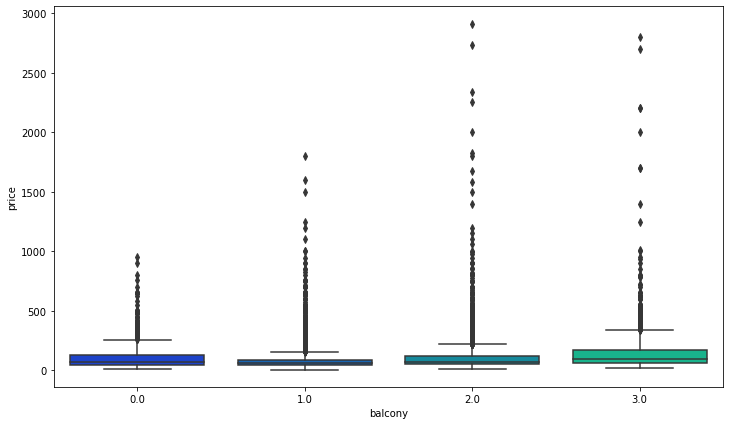

In [20]:
plt.figure(figsize=(12,7))
sns.boxplot(x='balcony',y='price',data=df,palette='winter')

In [22]:
len(df[df.balcony==2.0])

5113

<AxesSubplot:xlabel='balcony'>

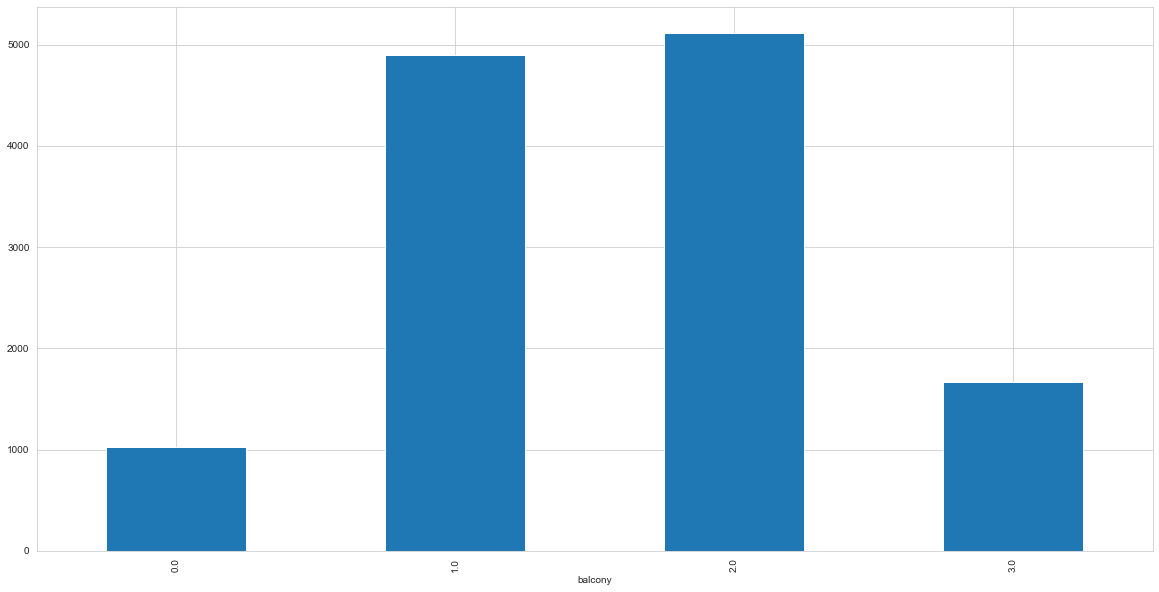

In [37]:
df.groupby('balcony')['size'].agg('count').plot.bar()

<AxesSubplot:xlabel='balcony', ylabel='count'>

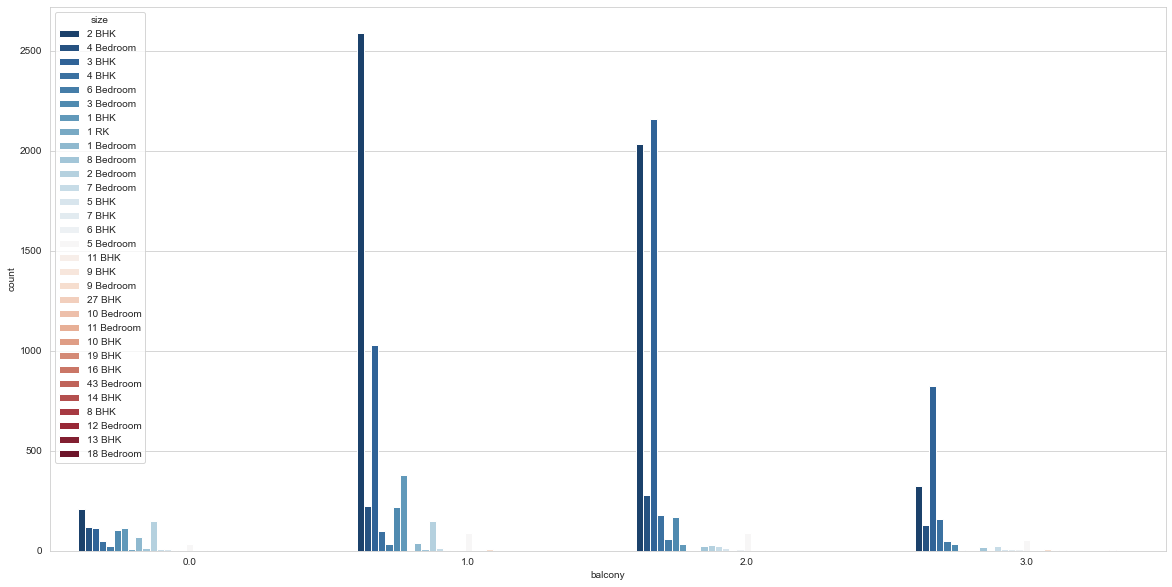

In [26]:
sns.set_style("whitegrid")
sns.countplot(x="balcony",hue='size',data=df, palette="RdBu_r")

## We can see that rooms with size 2BHK mostly have 1 balcony
### And flats with size 3BHK have mostly 2 balconies

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   total_sqft    13320 non-null  object 
 5   bath          13247 non-null  float64
 6   balcony       12711 non-null  float64
 7   price         13320 non-null  float64
dtypes: float64(3), object(5)
memory usage: 832.6+ KB


In [44]:
df[df.balcony.isnull()]

,area_type,availability,location,size,total_sqft,bath,balcony,price
6,Super built-up Area,18-May,Old Airport Road,4 BHK,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,3300,4.0,NaN,600.00
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,NaN,370.00
34,Built-up Area,Ready To Move,Kasturi Nagar,3 BHK,1925,3.0,NaN,125.00
40,Built-up Area,Ready To Move,Murugeshpalya,2 BHK,1296,2.0,NaN,81.00
...,...,...,...,...,...,...,...,...
13277,Plot Area,Ready To Move,Kundalahalli Colony,7 Bedroom,1400,7.0,NaN,218.00
13279,Plot Area,Ready To Move,Vishwanatha Nagenahalli,6 Bedroom,1200,5.0,NaN,130.00
13306,Plot Area,Ready To Move,Rajarajeshwari Nagara,4 Bedroom,1200,5.0,NaN,325.00
13309,Super built-up Area,Ready To Move,Yeshwanthpur,3 BHK,1675,3.0,NaN,92.13


In [54]:
def impute_bal(cols):
    size = cols[0]
    balcony = cols[1]
    if pd.isnull(balcony):
        if size == '2 BHK':
            return 1.0
        else:
            return 2.0
    else:
        return balcony

In [55]:
df['balcony'] = df[['size', 'balcony']].apply(impute_bal, axis=1)
df.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

<AxesSubplot:>

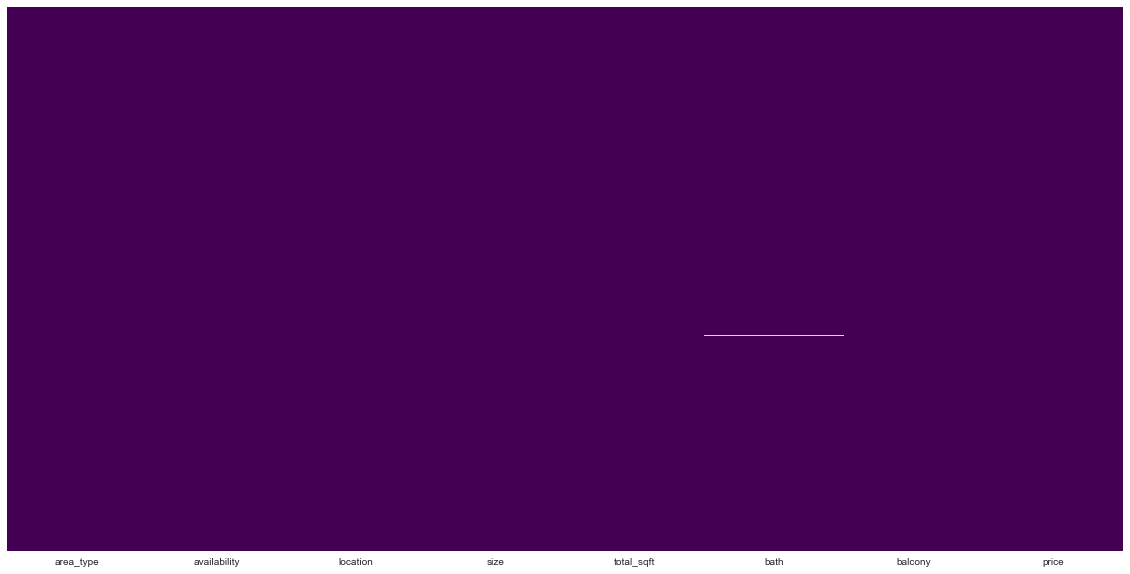

In [56]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

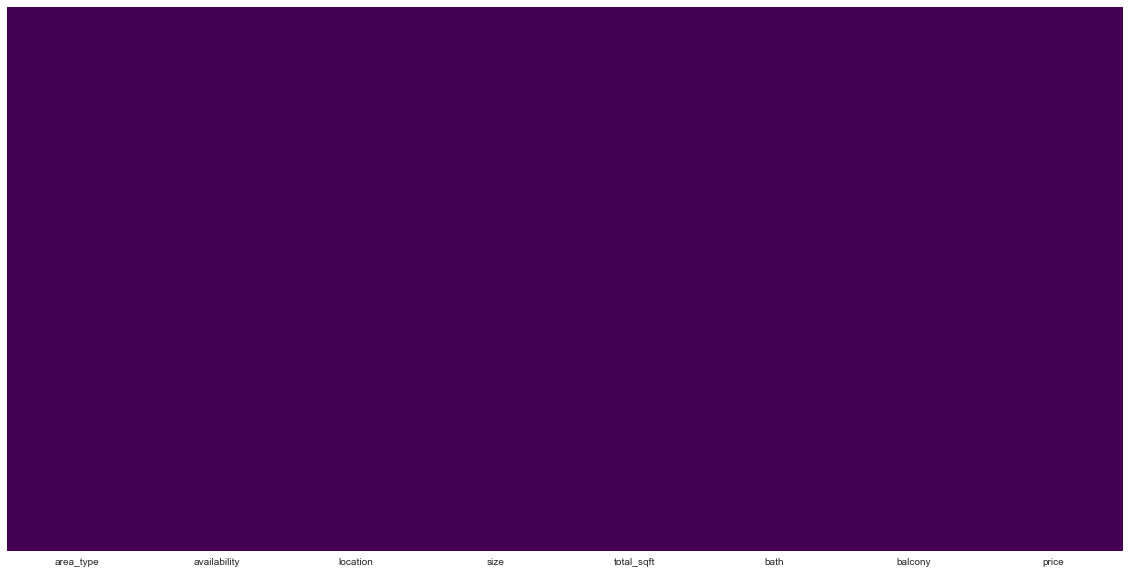

In [58]:
df.dropna(inplace=True)
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [59]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

#### We are done with data cleaning now
###### next we'll move to feature engg.

In [61]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [63]:
df['Size'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,Size
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [64]:
df.drop(['size'], axis=1, inplace=True)
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,Size
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2


In [66]:
df['Size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [67]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [68]:
df[~df['total_sqft'].apply(is_float)].head(10)

,area_type,availability,location,total_sqft,bath,balcony,price,Size
30,Super built-up Area,19-Dec,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,18-Mar,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Super built-up Area,Ready To Move,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,18-Sep,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
648,Built-up Area,Ready To Move,Arekere,4125Perch,9.0,2.0,265.000,9
661,Super built-up Area,Ready To Move,Yelahanka,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,18-Mar,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,4


#### Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [69]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [70]:
df.total_sqft = df['total_sqft'].apply(convert_sqft_to_num)
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,Size
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2


In [71]:
df.total_sqft.isnull().sum()

46

In [73]:
df.dropna(inplace=True)
df.isnull().sum()

area_type       0
availability    0
location        0
total_sqft      0
bath            0
balcony         0
price           0
Size            0
dtype: int64

In [74]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,Size,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [76]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [77]:
len(df.location.unique())

1298

<AxesSubplot:>

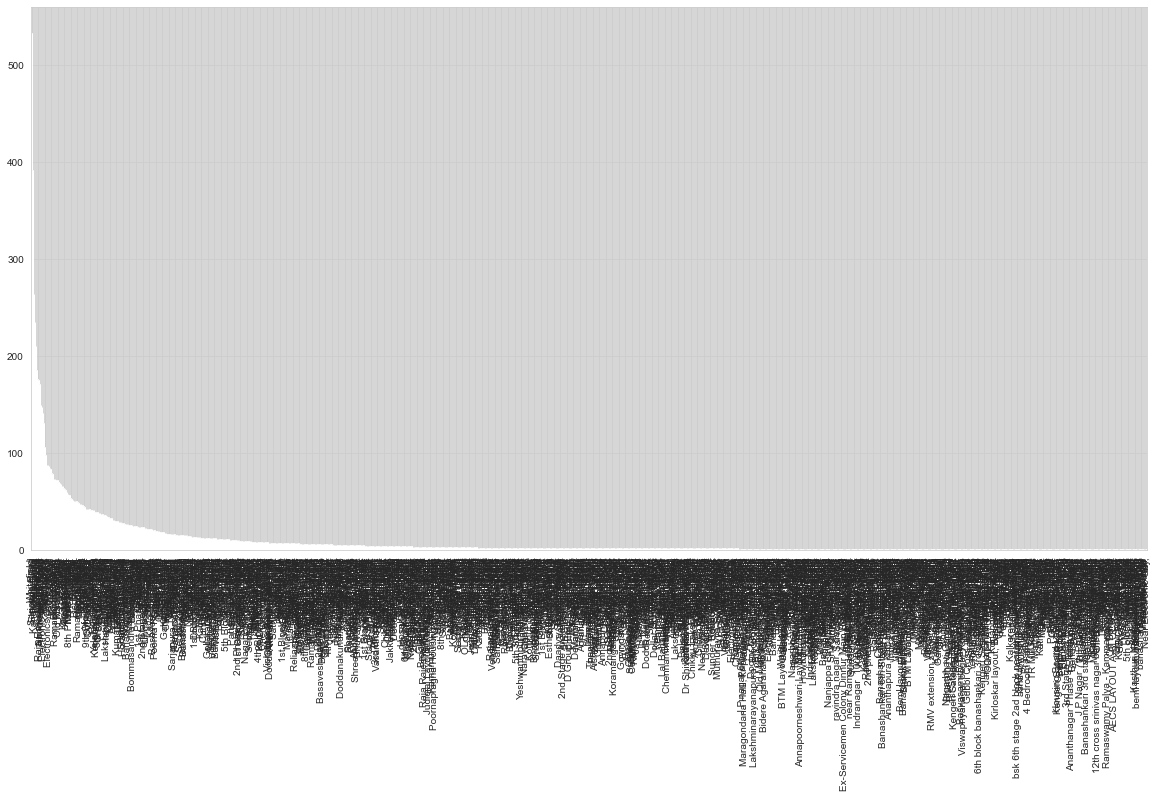

In [78]:
df.location = df.location.apply(lambda x: x.strip())
df.location.value_counts().plot.bar()

In [79]:
location_stats = df.location.value_counts()
location_stats

Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
Ashraya Layout             1
Marathalli bridge          1
Prakruthi Nagar            1
Hoskote near               1
Near Electronic City,      1
Name: location, Length: 1287, dtype: int64

In [80]:
location_stats_less10 = location_stats[location_stats<=10]
location_stats_less10

1st Block Koramangala    10
Thyagaraja Nagar         10
Ganga Nagar              10
Dodsworth Layout         10
Dairy Circle             10
                         ..
Ashraya Layout            1
Marathalli bridge         1
Prakruthi Nagar           1
Hoskote near              1
Near Electronic City,     1
Name: location, Length: 1047, dtype: int64

In [81]:
len(location_stats_less10)

1047

In [84]:
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less10 else x)
len(df.location.unique())

241

<AxesSubplot:>

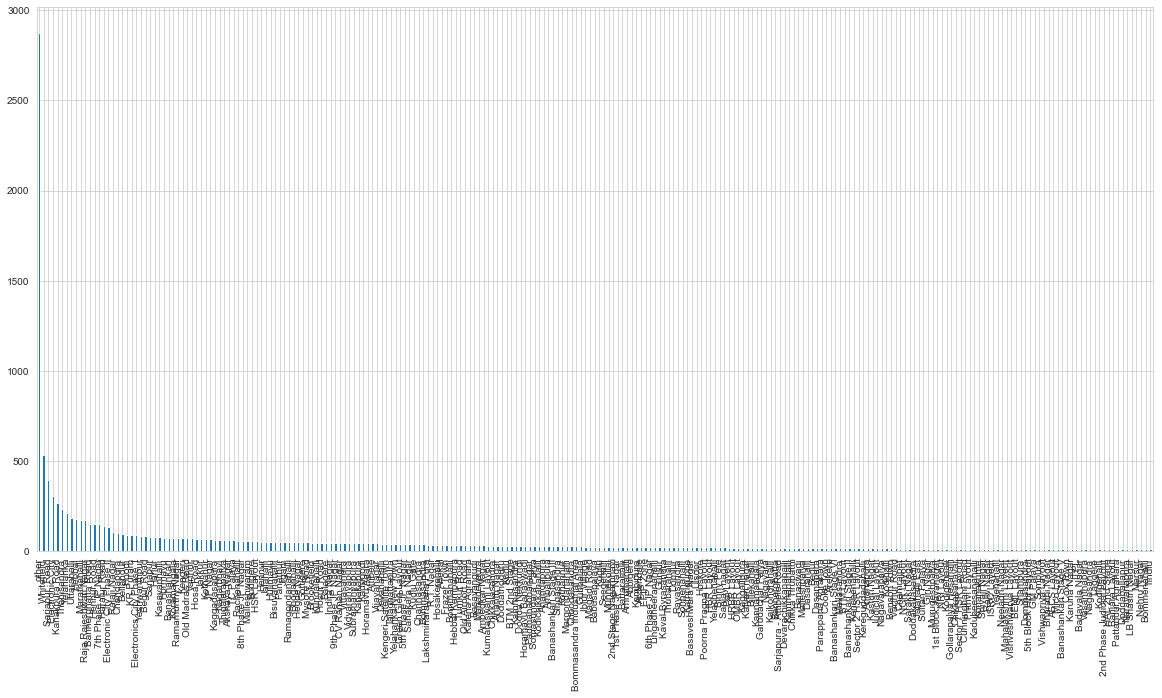

In [85]:
df.location.value_counts().plot.bar()

In [86]:
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,Size,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [87]:
df[df.total_sqft/df.Size < 300].head()

,area_type,availability,location,total_sqft,bath,balcony,price,Size,price_per_sqft
9,Plot Area,Ready To Move,other,1020.0,6.0,2.0,370.0,6,36274.509804
45,Plot Area,Ready To Move,HSR Layout,600.0,9.0,2.0,200.0,8,33333.333333
58,Plot Area,Ready To Move,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Ready To Move,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,Ready To Move,other,500.0,3.0,2.0,100.0,3,20000.000000


In [88]:
df.shape

(13200, 9)

In [89]:
df = df[~(df.total_sqft/df.Size < 300)]
df.shape

(12456, 9)

In [92]:
df.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

<AxesSubplot:>

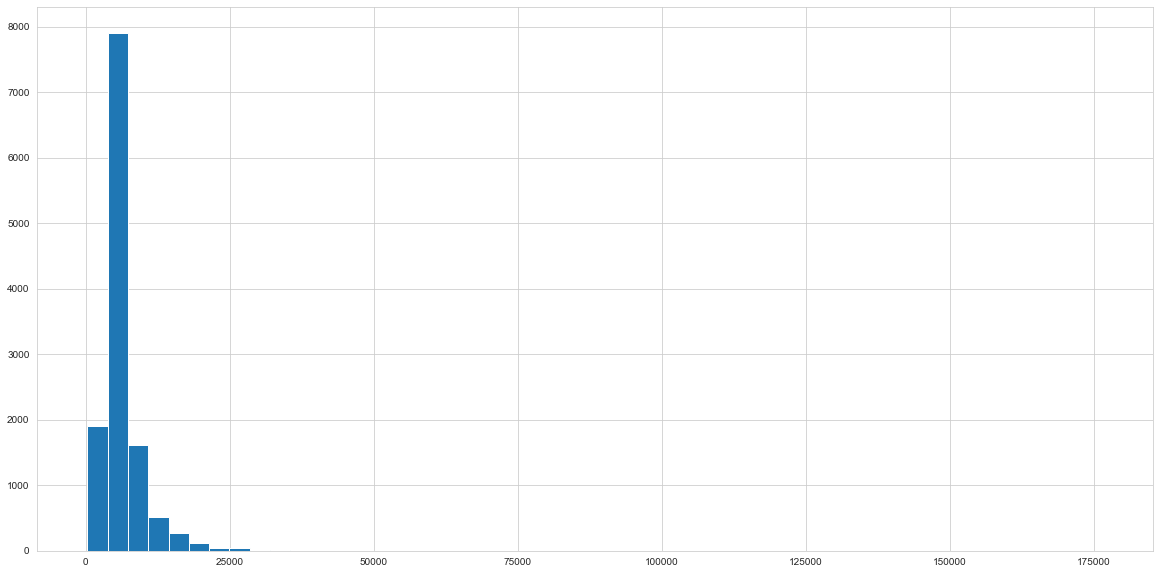

In [100]:
df.price_per_sqft.hist(bins=50)

In [101]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,Size,price_per_sqft
0,Super built-up Area,20-May,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,Super built-up Area,18-Jun,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,Super built-up Area,Ready To Move,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,Built-up Area,15-Dec,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
4,Super built-up Area,18-Jun,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668


In [102]:
df.shape

(10242, 9)

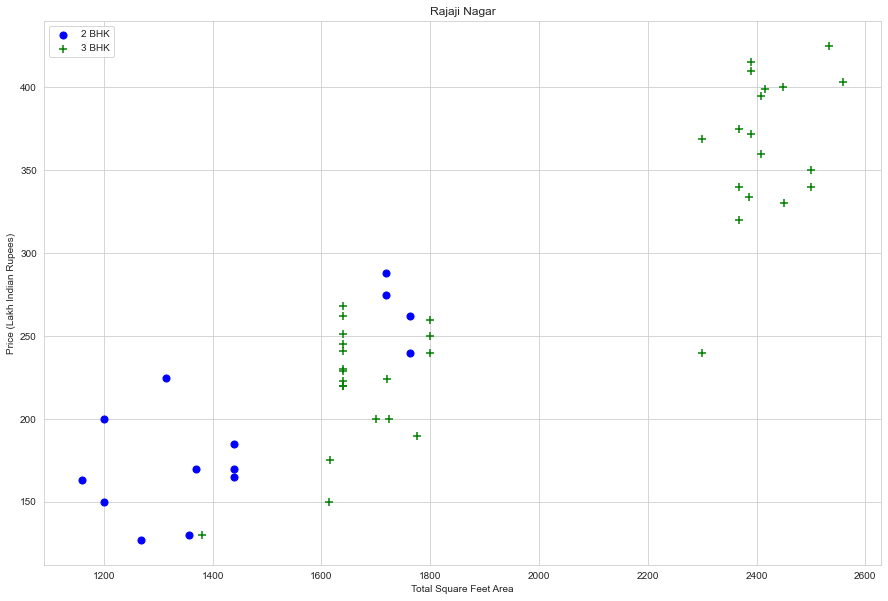

In [104]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.Size==2)]
    bhk3 = df[(df.location==location) & (df.Size==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df,"Rajaji Nagar")

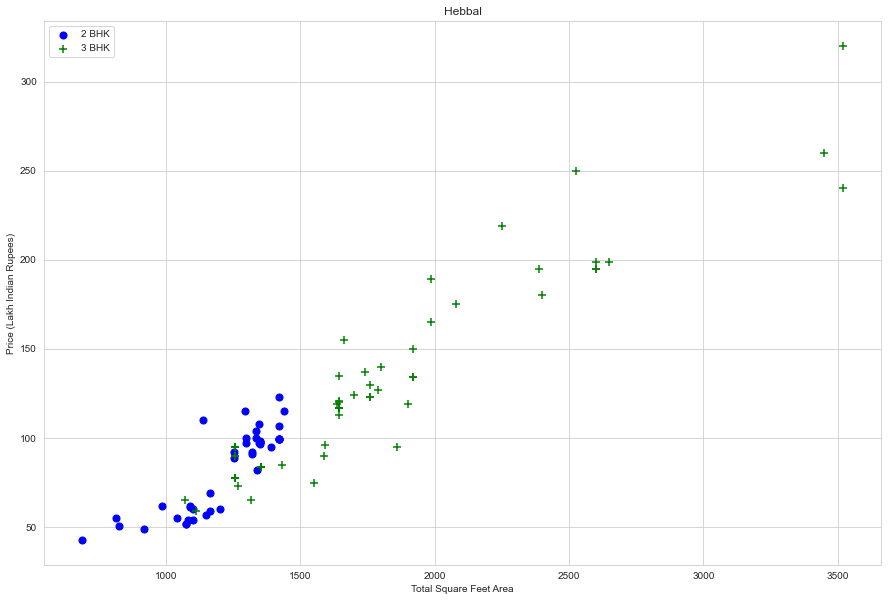

In [105]:
plot_scatter_chart(df,"Hebbal")

##### We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{

    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    
    
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    
    },    
}
##### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [106]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('Size'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('Size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,Size,price_per_sqft
0,Super built-up Area,20-May,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,Super built-up Area,18-Jun,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,Super built-up Area,Ready To Move,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,Built-up Area,15-Dec,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
4,Super built-up Area,18-Jun,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668


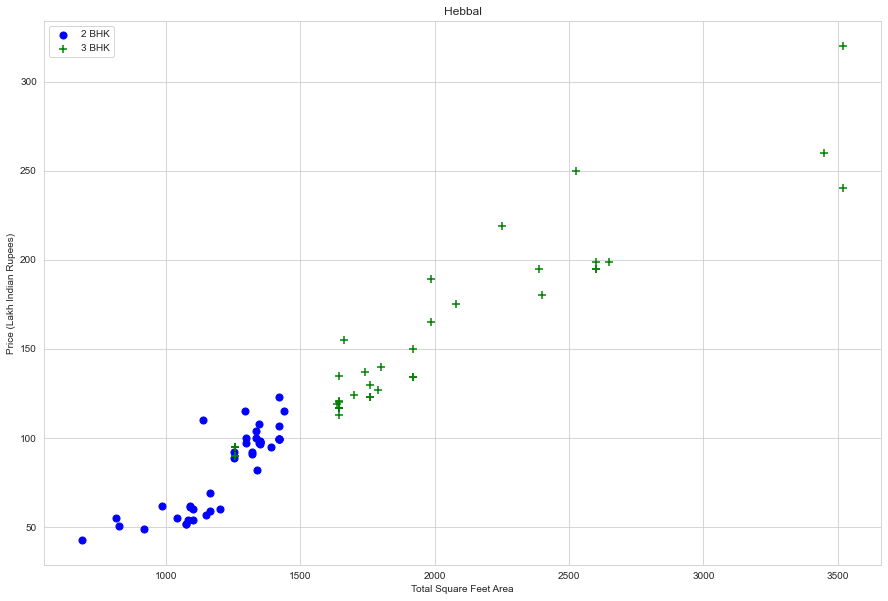

In [107]:
plot_scatter_chart(df,"Hebbal")

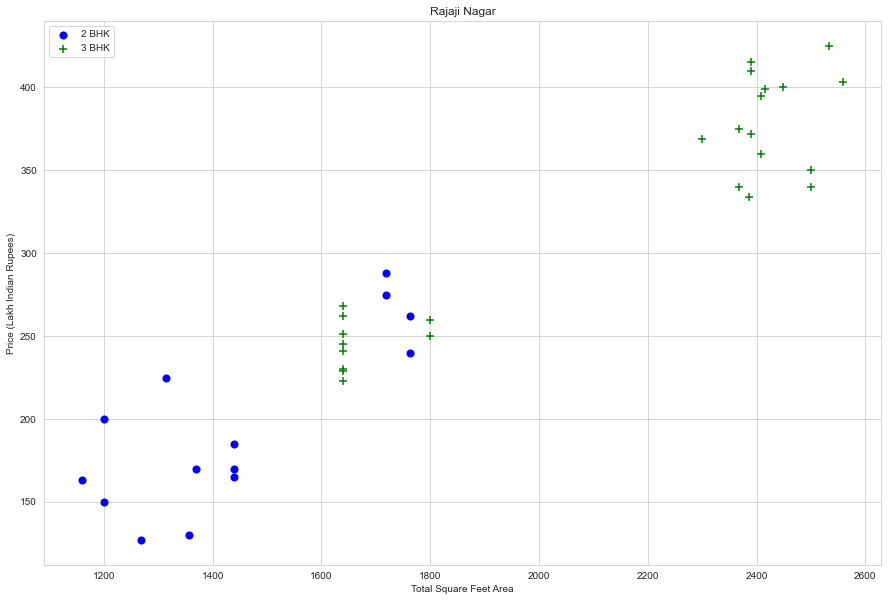

In [108]:
plot_scatter_chart(df,"Rajaji Nagar")

In [109]:
df.shape

(7317, 9)

<AxesSubplot:>

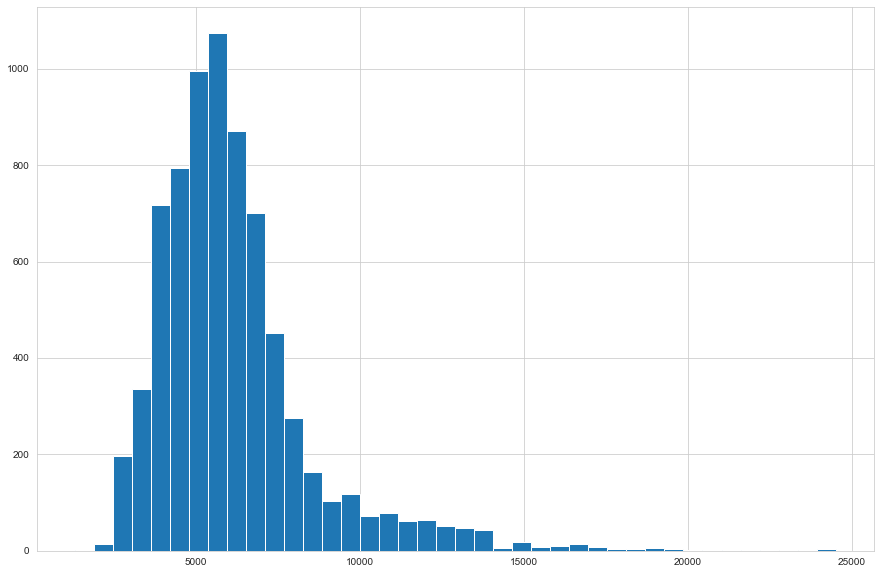

In [110]:
df.price_per_sqft.hist(bins=40)

<AxesSubplot:>

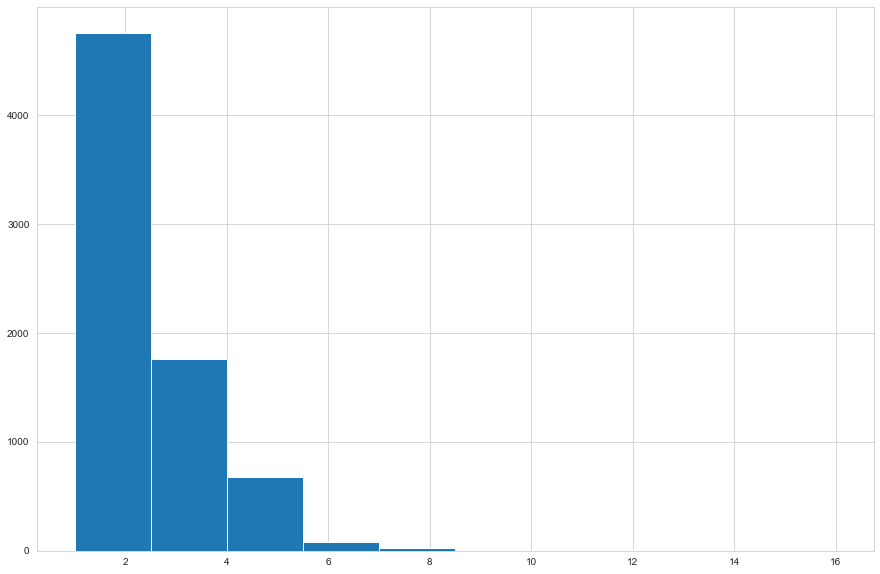

In [112]:
df.bath.hist(bins=10)

In [113]:
df[df.bath>df.Size+2]

,area_type,availability,location,total_sqft,bath,balcony,price,Size,price_per_sqft
1626,Built-up Area,Ready To Move,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
5238,Built-up Area,Ready To Move,Nagasandra,7000.0,8.0,2.0,450.0,4,6428.571429
6711,Super built-up Area,Ready To Move,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
8408,Super built-up Area,Ready To Move,other,11338.0,9.0,1.0,1000.0,6,8819.897689


In [114]:
df = df[df.bath<df.Size+2]

In [115]:
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,Size,price_per_sqft
0,Super built-up Area,20-May,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,Super built-up Area,18-Jun,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,Super built-up Area,Ready To Move,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,Built-up Area,15-Dec,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
4,Super built-up Area,18-Jun,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668


In [116]:
df.shape

(7239, 9)

In [120]:
df.drop(['area_type'], axis=1, inplace=True)
df.head()

,location,total_sqft,bath,balcony,price,Size
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [121]:
df.shape

(7239, 6)

In [124]:
dummies=pd.get_dummies(df.location)

In [125]:
df = pd.concat([df, dummies.drop('other', axis=1)], axis='columns')
df.head()

,location,total_sqft,bath,balcony,price,Size,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
df.drop(['location'], axis=1, inplace=True)
df.head()

,total_sqft,bath,balcony,price,Size,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
df.shape

(7239, 245)

In [128]:
X = df.drop(['price'], axis=1)
X.head()

,total_sqft,bath,balcony,Size,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
y = df.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [131]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8627263101473439

### Use K Fold cross validation to measure accuracy of our LinearRegression model

In [132]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82692418, 0.86033687, 0.85325499, 0.84368195, 0.85485059])

#### Find best model using GridSearchCV

In [133]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [134]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.847810,{'normalize': False}
1,lasso,0.726848,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.701621,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [136]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [137]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

87.0386453883012

In [138]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

90.9726823193586

In [139]:
predict_price('Indira Nagar',1000, 2, 2)

196.4572930126269

In [140]:
predict_price('Indira Nagar',1000, 3, 3)

200.3913299436843

In [148]:
import pickle

In [149]:
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [150]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))